In [18]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

In [1]:
from utils import *
from load_data import *
from networks import *

In [2]:
import torch.nn.functional as F

loss_func = F.mse_loss

In [3]:
load_cifar10?

In [4]:
n = 1000
k = 10
x_train, y_train, x_val, y_val = load_cifar10(n,grayscale=False,flatten=True,whiten=False,downsample_factor=2,device='cpu')

torch.Size([1000, 3, 32, 32])
Downsampling Cifar data by a factor of 2
Resulting image size: (16 x 16) 
Subsampling 1000 data points.
torch.Size([1000, 768]) torch.Size([1000, 768])
Loaded Cifar-10...
x_train.shape:  torch.Size([1000, 768])


/users/staff/dmi-dmi/zhao0005/Hessian_eigenspectrum/load_data.py:152: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_downsampled[i,j,:,:] = torch.tensor(tmp_downsampled)
/users/staff/dmi-dmi/zhao0005/Hessian_eigenspectrum/load_data.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_valid_downsampled[i,j,:,:] = torch.tensor(tmp_downsampled)
/users/staff/dmi-dmi/zhao0005/Hessian_eigenspectrum/load_data.py:184: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.int64, device=device)
/users/s

In [19]:
d = 768
m = 100
l = 1
bias = False

model = Sequential_NN(d,m,k,l,bias,'linear',batch_norm=False)

bias False


In [20]:
model

Sequential_NN(
  (activ): Identity()
  (lin_out): Linear(in_features=100, out_features=10, bias=False)
  (lin_in): Linear(in_features=768, out_features=100, bias=False)
  (lin_hidden): ModuleList(
    (0): Linear(in_features=100, out_features=100, bias=False)
  )
  (sequential): Sequential(
    (0): Linear(in_features=768, out_features=100, bias=False)
    (1): Identity()
    (2): Linear(in_features=100, out_features=100, bias=False)
    (3): Identity()
    (4): Linear(in_features=100, out_features=10, bias=False)
  )
)

In [21]:
X = x_train.T.to(torch.float64)
Y = y_train.T

In [22]:
l_star = np.linalg.norm(Y @ ((X.T @ np.linalg.inv(X@X.T) @ X) - torch.eye(n)),'fro')**2/(k*n)
l_star

0.020404673915803577

In [23]:
file_path = 'pandas_dataframes_new'

markers = ['o','s','^','d','*']

In [24]:
def load_pandas_df(file_path, file_name):
    file = file_path + '/' + file_name
    df = pd.read_pickle(file)
    
    return df

In [176]:
def load_training_info(experiment, init, BS, lr, m, L):
    
    fn = f'training_information_{experiment}_cifar-10_whitened_init={init}_d=192_m=[{m}]_L=[{L}]_linear_SGD_lr={lr}_BS={BS}.pkl'

    df = load_pandas_df(file_path, fn)
    df = df.astype({'acc': float})
    
    return df



In [177]:
BS = 256
lrs = [0.2]
L = 2
m = 500
inits = 3
experiment = 'training_n=1000_xavier_init_downsample_fac=4'

dfs = []
for lr in lrs:
    for init in range(inits):
        df = load_training_info(experiment, init, BS, lr, m, L)
        df.insert(0,'lr',lr)
        dfs.append(df)

In [178]:
df_training_info = pd.concat(dfs)

In [179]:
df_training_info

,lr,width,depth,activ_f,epoch,loss,grad_norm_squared,acc,full_grad_norm
0,0.2,500.0,2.0,linear,0.0,0.101106,NaN,0.095,0.014862
1,0.2,500.0,2.0,linear,0.0,0.101091,NaN,0.095,0.014410
2,0.2,500.0,2.0,linear,0.0,0.101076,NaN,0.094,0.014808
3,0.2,500.0,2.0,linear,0.0,0.101060,NaN,0.095,0.015515
4,0.2,500.0,2.0,linear,1.0,0.101045,NaN,0.095,0.014849
...,...,...,...,...,...,...,...,...,...
11995,0.2,500.0,2.0,linear,2998.0,0.070955,NaN,0.648,0.016144
11996,0.2,500.0,2.0,linear,2999.0,0.070957,NaN,0.648,0.016319
11997,0.2,500.0,2.0,linear,2999.0,0.070956,NaN,0.648,0.015312
11998,0.2,500.0,2.0,linear,2999.0,0.070956,NaN,0.649,0.015850


In [180]:
df_training_info_fil = df_training_info[df_training_info['epoch'] %50 == 0]

In [181]:
df_training_info_fil

,lr,width,depth,activ_f,epoch,loss,grad_norm_squared,acc,full_grad_norm
0,0.2,500.0,2.0,linear,0.0,0.101106,NaN,0.095,0.014862
1,0.2,500.0,2.0,linear,0.0,0.101091,NaN,0.095,0.014410
2,0.2,500.0,2.0,linear,0.0,0.101076,NaN,0.094,0.014808
3,0.2,500.0,2.0,linear,0.0,0.101060,NaN,0.095,0.015515
200,0.2,500.0,2.0,linear,50.0,0.098220,NaN,0.203,0.014382
...,...,...,...,...,...,...,...,...,...
11603,0.2,500.0,2.0,linear,2900.0,0.070956,NaN,0.648,0.016143
11800,0.2,500.0,2.0,linear,2950.0,0.070957,NaN,0.648,0.016319
11801,0.2,500.0,2.0,linear,2950.0,0.070956,NaN,0.648,0.015311
11802,0.2,500.0,2.0,linear,2950.0,0.070956,NaN,0.649,0.015850


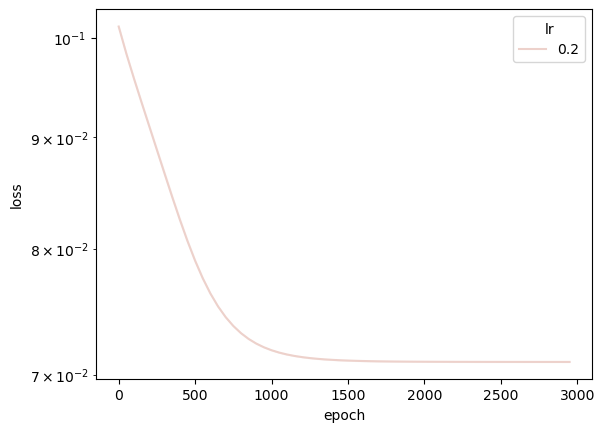

In [183]:
sns.lineplot(df_training_info_fil, x='epoch', y='loss', hue='lr')
plt.yscale('log')

# plt.plot(l_star*np.ones(10000))

In [149]:
df_training_info.min()

lr                       0.01
width                   100.0
depth                     2.0
activ_f                linear
epoch                     0.0
loss                 0.041876
grad_norm_squared         NaN
acc                     0.068
full_grad_norm       0.218709
dtype: object

In [170]:
fn = 'outer_prod_hessian_information_training_n=1000_xavier_init_downsample_fac=4_cifar-10_whitened_m=500_L=[2]_lr=[0.2]_BS=256.pkl'
df = load_pandas_df(file_path,fn)

In [171]:
df

,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,lr,epoch,type,value,H_o_spectrum,sparsity
0,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,0,H_o_cond,8.754954,"[4.647983630061277e-07, 4.766731109587699e-07,...",1.0
1,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,0,H_o_cond_bound1,10.202193,"[4.647983630061277e-07, 4.766731109587699e-07,...",1.0
2,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,0,H_o_cond_bound2,63.066424,"[4.647983630061277e-07, 4.766731109587699e-07,...",1.0
3,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,100,H_o_cond,8.575050,"[4.776357592807417e-07, 4.897340778796542e-07,...",1.0
4,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,100,H_o_cond_bound1,9.857433,"[4.776357592807417e-07, 4.897340778796542e-07,...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,2900,H_o_cond_bound1,6.864517,"[1.912925011684476e-06, 1.920606197243734e-06,...",1.0
275,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,2900,H_o_cond_bound2,161.607390,"[1.912925011684476e-06, 1.920606197243734e-06,...",1.0
276,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,2999,H_o_cond,6.673091,"[1.914258333378939e-06, 1.921935770954206e-06,...",1.0
277,cifar-10,sequential,1.0,192,10,500,2,linear,0.200000,2999,H_o_cond_bound1,6.859656,"[1.914258333378939e-06, 1.921935770954206e-06,...",1.0


In [172]:
df_fil = df[df['type'] != 'H_o_cond_bound2']

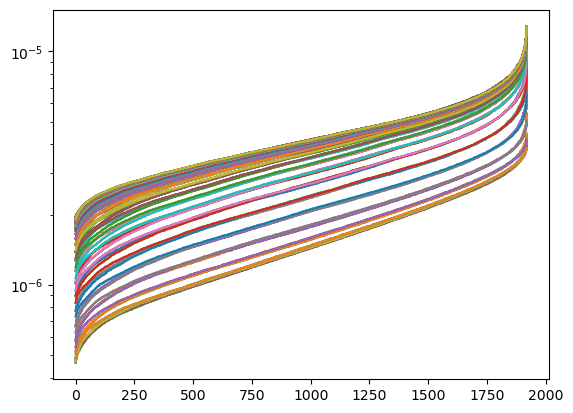

In [173]:
for i in range(len(df)):
    plt.semilogy(df.H_o_spectrum.iloc[i] )

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


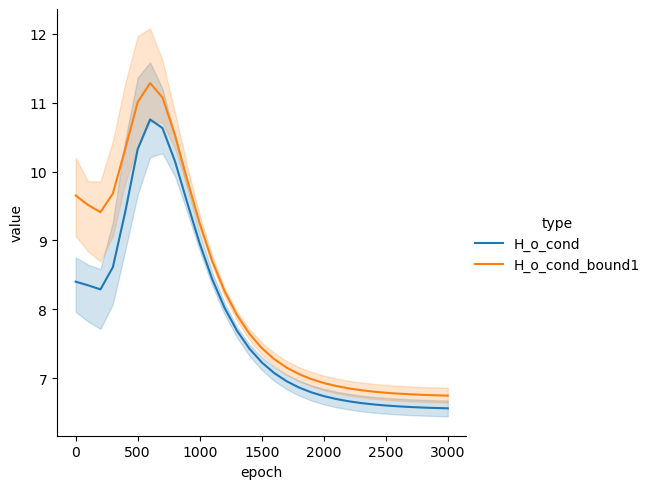

In [174]:
sns.relplot(df_fil,x='epoch',y='value',hue='type',kind='line')
# plt.yscale('log')

# plt.plot([0,10000],[df.H_o_spectrum.iloc[0][-1]/df.H_o_spectrum.iloc[0][-760],df.H_o_spectrum.iloc[0][-1]/df.H_o_spectrum.iloc[0][-760]])